In [1]:
#G2M Investment for cab firm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
cab_data = pd.read_csv ("Cab_Data.csv")
city_data = pd.read_csv ("City.csv")
customerId_data = pd.read_csv ("Customer_ID.csv")
transactionId_data = pd.read_csv ("Transaction_ID.csv")

In [3]:
pd.read_csv('Transaction_ID.csv', 
            sep = ',', 
            skipinitialspace = True)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab_data.shape

(359392, 7)

In [6]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
customerId_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:

customerId_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
customerId_data.shape

(49171, 4)

In [10]:
transactionId_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [11]:
transactionId_data.shape

(440098, 3)

In [12]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [13]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [14]:
customerId_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [15]:
transactionId_data = transactionId_data. dropna( how="any")


In [16]:
transactionId_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

No null values detected

In [17]:
for col in cab_data.columns:
  if' ' in col:
    cab_data= cab_data.rename(columns={col:col.replace(' ','_')}) 

In [18]:
for col in city_data.columns:
  if' ' in col:
    city_data= city_data.rename(columns={col:col.replace(' ','_')}) 

In [19]:
for col in customerId_data.columns:
  if' ' in col:
    customerId_data= customerId_data.rename(columns={col:col.replace(' ','_')}) 

In [20]:
for col in transactionId_data.columns:
  if' ' in col:
    transactionId_data= transactionId_data.rename(columns={col:col.replace(' ','_')}) 

In [21]:

from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [22]:
cab_data['Date_of_Travel'] = cab_data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [23]:
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [24]:
months=[]
years =[]
for i in range(len(cab_data['Date_of_Travel'])):
    months.append(cab_data['Date_of_Travel'][i].month)
    years.append(cab_data['Date_of_Travel'][i].year)
cab_data['Month'] = months
cab_data['Year'] = years

cab_data.drop('Date_of_Travel', axis=1, inplace=True)

In [25]:
Pinkcab = cab_data[cab_data['Company'] =='Pink Cab']
Yellowcab = cab_data[cab_data['Company'] =='Yellow Cab']


In [26]:
cab_data.head(6)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016
5,10000016,Pink Cab,ATLANTA GA,6.06,72.43,63.024,1,2016


**Checking the Profit made by Pink Cab**

In [27]:
cab_data[cab_data.Company == 'Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost_of_Trip, dtype: float64

In [28]:
cab_data[cab_data.Company == 'Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price_Charged, dtype: float64

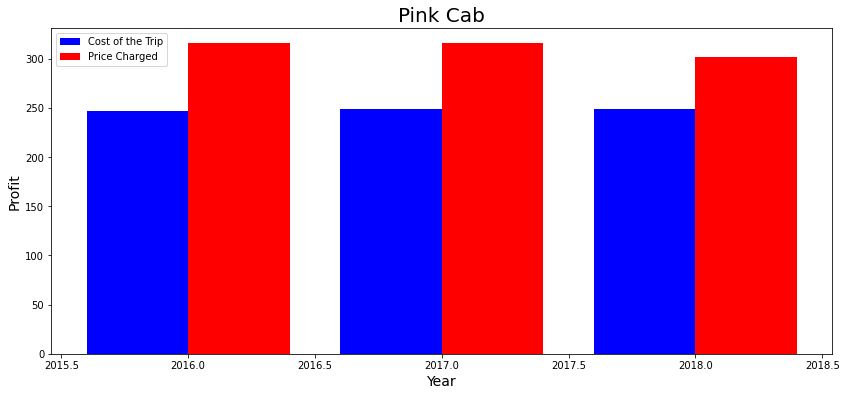

In [29]:
plot0 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot1 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot2 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot0.index-0.2, plot2.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot0.index+0.2, plot1.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

**Yellow** **Cab** 

In [30]:
cab_data[cab_data.Company == 'Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost_of_Trip, dtype: float64

In [31]:
cab_data[cab_data.Company == 'Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price_Charged, dtype: float64

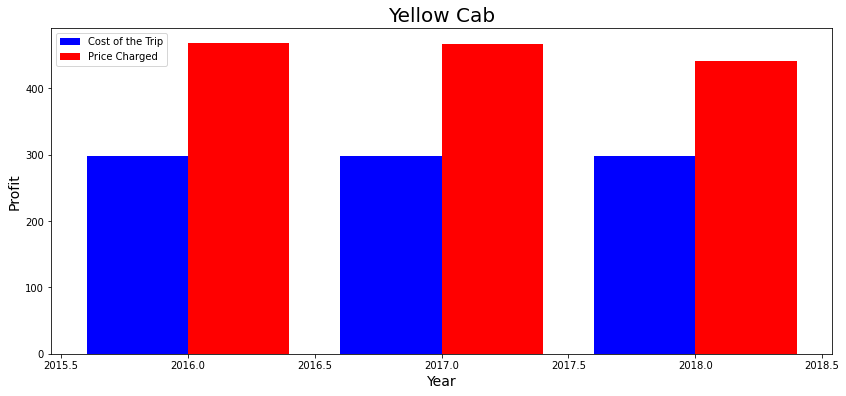

In [32]:
plot0 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot1 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot2 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot0.index-0.2, plot2.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot0.index+0.2, plot1.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

In [33]:
cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price_Charged, dtype: float64

In [34]:
cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price_Charged, dtype: float64

# **Clearly Yellow Cab has a highest profit Margin compared to Pink Cab. **
**# Margin=Price_charged - Cost_of_trip **

In [35]:


left = cab_data.set_index(['Transaction_ID'])
right = transactionId_data.set_index(['Transaction_ID'])
data = left.join(right)
data
    

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,52265,Cash


In [36]:
left = data.set_index([data.index,'City'])
right = city_data.set_index(['City'])

data = left.join(right)
data


,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Population,Users
Transaction_ID,City,,,,,,,,,,
10000011,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,29290,Card,"814,885","24,701"
10000012,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,27703,Card,"814,885","24,701"
10000013,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,28712,Cash,"814,885","24,701"
10000014,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,28020,Cash,"814,885","24,701"
10000015,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,27182,Card,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...
10440101,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,52392,Cash,"418,859","127,001"
10440104,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,53286,Cash,"418,859","127,001"
10440105,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,52265,Cash,"418,859","127,001"


In [37]:
left = data.set_index([data.index,'Customer_ID'])
right = customerId_data.set_index(['Customer_ID'])

data = left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Population,Users,Gender,Age,Income_(USD/Month)
Transaction_ID,City,Customer_ID,,,,,,,,,,,,
10000011,ATLANTA GA,29290,Pink Cab,30.45,370.95,313.6350,1,2016,Card,"814,885","24,701",Male,28,10813
10000012,ATLANTA GA,27703,Pink Cab,28.62,358.52,334.8540,1,2016,Card,"814,885","24,701",Male,27,9237
10000013,ATLANTA GA,28712,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,"814,885","24,701",Male,53,11242
10000014,ATLANTA GA,28020,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,"814,885","24,701",Male,23,23327
10000015,ATLANTA GA,27182,Pink Cab,8.73,114.62,97.7760,1,2016,Card,"814,885","24,701",Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,WASHINGTON DC,52392,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,"418,859","127,001",Male,24,15651
10440104,WASHINGTON DC,53286,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,"418,859","127,001",Male,32,6528
10440105,WASHINGTON DC,52265,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,"418,859","127,001",Male,56,7966


In [38]:
data = data.reset_index()

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  int64  
 1   City                359392 non-null  object 
 2   Customer_ID         359392 non-null  int64  
 3   Company             359392 non-null  object 
 4   KM_Travelled        359392 non-null  float64
 5   Price_Charged       359392 non-null  float64
 6   Cost_of_Trip        359392 non-null  float64
 7   Month               359392 non-null  int64  
 8   Year                359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
 12  Gender              359392 non-null  object 
 13  Age                 359392 non-null  int64  
 14  Income_(USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(6), object(6)

Created a Bar chart to see distribution of Users over the cities


As seen from the above chart, Yellow Cab Users are highest in NewYork City and Chicago and Pink Cab users are highest in Los Angeles, NewYork and San Diego

In [40]:
data['Profit'] = (data['Price_Charged']-data['Cost_of_Trip'])

In [42]:
 import plotly.express as px
pinkcab_data = data[data['Company'] == 'Pink Cab']
yellowcab_data = data[data['Company'] == 'Yellow Cab']

dict1 = {"Pink Cab" : [pinkcab_data["Profit"].sum()] ,"Yellow Cab" : [yellowcab_data["Profit"].sum()] }

data1_0 = pd.DataFrame(dict1).T

fig1 = px.pie(data1_0,
                        values=data1_0[0],
                        names=data1_0.index ,title="Total Profit made by both the Cab Firms"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

In [47]:
import plotly.graph_objects as go

data2_1 = data[data["Company"] == "Pink Cab"].groupby("Gender").count()
data2_2 = data[data["Company"] == "Yellow Cab"].groupby("Gender").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data2_1.index,
                    y=data2_2['Users'],
                    name='Pink Cab',
                    marker_color='blue' 
                    ))            
fig.add_trace(go.Bar(
                    x=data2_1.index,
                    y=data2_2['Users'],
                    name='Yellow Cab',
                    marker_color='orange'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over Gender")

In [62]:
Youngsters_agegroup  = data[(data ["Age"] >= 18) & (data ["Age"] < 35)].count()
Middle_agegroup = data[(data ["Age"] >= 35) & (data ["Age"] < 60)].count()
Old_agegroup    = data[(data ["Age"] >= 60) & (data ["Age"] <= 85)].count()

dict = {"25 > Age >= 18 (YOUNG)" : Youngsters_agegroup ,"40 > Age >= 35 (MIDDLE)" :Middle_agegroup , "60 >= Age >= 40 (OLD)" : Old_agegroup }
data3_1 = pd.DataFrame(dict).data3_1 = data.groupby("Age").count()
fig1 = px.pie(data3_1,
                        values=data3_1.Users,
                        names=data3_1.index ,title="Total Users Overview based on Payment Method"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



Age group of 23 have **relatively higher percentage ** compared to the rest of the age group

In [61]:
data4_0 = data.groupby("City")["Income_(USD/Month)"].mean()
data4_0 = pd.DataFrame(data4_0)
fig1 = px.pie(data4_0,
                        values=data4_0["Income_(USD/Month)"],
                        names=data4_0.index ,title="Average Income based on Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

### **All the cities in the USA are having the same amount of Income as per the chart**